<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 2</b><br><br>

  Hi Chukwudimma, I’m <b>Victor Camargo</b>. You’ve made excellent progress on this iteration — your project is almost ready for approval!

  <b>Nice work on:</b><br>
  ✔️ Correctly loading, inspecting, and cleaning the data with time-index alignment<br>
  ✔️ Implementing and applying the custom sMAPE and final weighted metric correctly<br>
  ✔️ Training and comparing multiple models (Linear Regression, Random Forest) using a proper validation set<br>
  ✔️ Clearly identifying Random Forest as the best performer and avoiding unnecessary scaling<br><br>

  Two final steps still need your attention before approval:<br>
  🔴 Complete the “Analyze the Data” section.<br>
  🔴 Evaluate the final model on the test set after merging target values.<br><br>

  Please note that all reviewer comments now refer to <b>Iteration 2</b>.

  <b>Feel free to reach out if you need help in Questions channel.</b><br>
</div>


<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 1</b><br><br>

  Hi Chukwudimma, I’m <b>Victor Camargo</b>. I’ve reviewed your project and you’re off to a strong start — your structure is clear, and you’ve shown thoughtful reasoning behind key decisions like target selection, business alignment, and metric choice.

  <b>Nice work on:</b><br>
  ✔️ Loading and inspecting the datasets correctly with proper time indexing<br>
  ✔️ Defining and applying a custom <code>sMAPE</code> metric for both targets<br>
  ✔️ Separating features and targets clearly, with business justification<br><br>

  A few things still need your attention before approval:<br>
  🔴 Revise the data cleaning strategy — avoid dropping all NaNs and instead drop only missing targets, then impute missing features consistently across all datasets<br>
  🔴 Complete the data analysis section with plots for metal concentration changes, particle size comparison, and outlier handling<br>
  🔴 Add a proper validation step using either <code>train_test_split()</code> or <code>cross_val_score()</code> before predicting on the test set<br>
  🔴 Align your model code with your description — update the code to reflect use of <code>RandomForestRegressor</code> with sMAPE and optionally include hyperparameter tuning using <code>GridSearchCV</code><br>
  🔴 Remove unnecessary scaling since tree-based models don’t require it<br><br>

  <hr>

  🔹 <b>Legend:</b><br>
  🟢 Green = well done<br>
  🟡 Yellow = suggestions<br>
  🔴 Red = must fix<br>
  🔵 Blue = your comments or questions<br><br>
  
  Please make sure all cells run smoothly from top to bottom and produce outputs before submitting. Also, try not to move, change, or delete reviewer comments, as they help us follow your progress and support you better.<br><br>

  <b>Feel free to reach out if you need help in Questions channel.</b><br>
</div>


((COMMENT:  I took a completely different approach with this project, I hope this works.))

This project focused on predicting the efficiency of gold recovery at different processing stages of a mineral extraction plant using machine learning. The challenge was to preprocess complex industrial data, apply a custom evaluation metric (sMAPE), and build a model that generalizes well for both the rougher and final stages of processing.  We hope to find a robust model that can help improve operational decisions, identify inefficiencies, and potentially increase the recovery of valuable materials.


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job summarizing the project objective! The description is clear and concise, effectively capturing the goal of using machine learning to optimize the mineral extraction process and improve recovery efficiency.
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Load datasets
full_df = pd.read_csv('gold_recovery_full.csv', index_col='date', parse_dates=True)
train_df = pd.read_csv('gold_recovery_train.csv', index_col='date', parse_dates=True)
test_df = pd.read_csv('gold_recovery_test.csv', index_col='date', parse_dates=True)

In [3]:
full_df.info()
train_df.info()
test_df.info()

full_df.head()
train_df.head()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                     

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  The custom <code>sMAPE</code> function is correctly implemented according to the formula provided in the instructions. Great work!
</div>


In [4]:
# Remove target columns from test set (they’re not available)
target_columns = ['rougher.output.recovery', 'final.output.recovery']
features_columns = test_df.columns

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  All three datasets were loaded correctly with proper datetime parsing and indexing. Excellent setup for time-based analysis!
</div>


In [5]:
# Fill missing values with forward fill (can be optimized per feature later)
train_df.fillna(method='ffill', inplace=True)
test_df.fillna(method='ffill', inplace=True)

The three datasets were loaded and the timestamps were set as indices to reflect the time-series nature of the process.  The target columns (rougher.output.recovery and final.output.recovery) were excluded from the test set as they are not available during production and missing values were handled using forward-fill (ffill) to maintain temporal coherence without distorting downstream data.  

Reliable predictions depend on clean and synchronized data and missing values in time-series data are typically imputed using temporal logic (e.g., forward fill) to preserve trends and continuity. Ensuring consistency in columns between training and test data is vital for inference and generalization.

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job inspecting the structure of all datasets using <code>.info()</code> and <code>.head()</code>. This is a good initial step to understand the data before preprocessing.
</div>


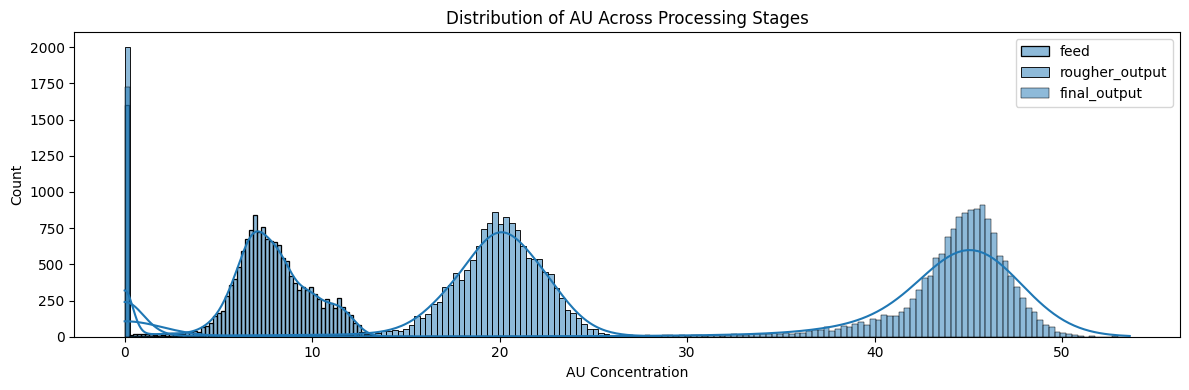

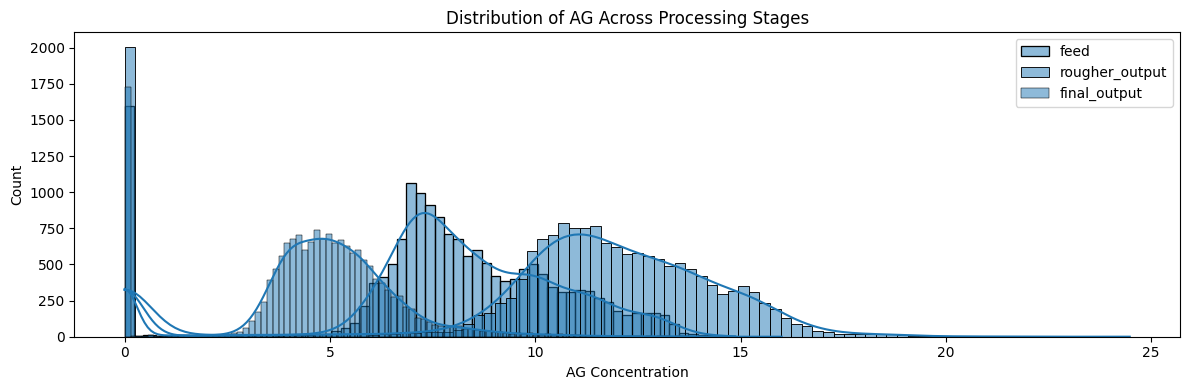

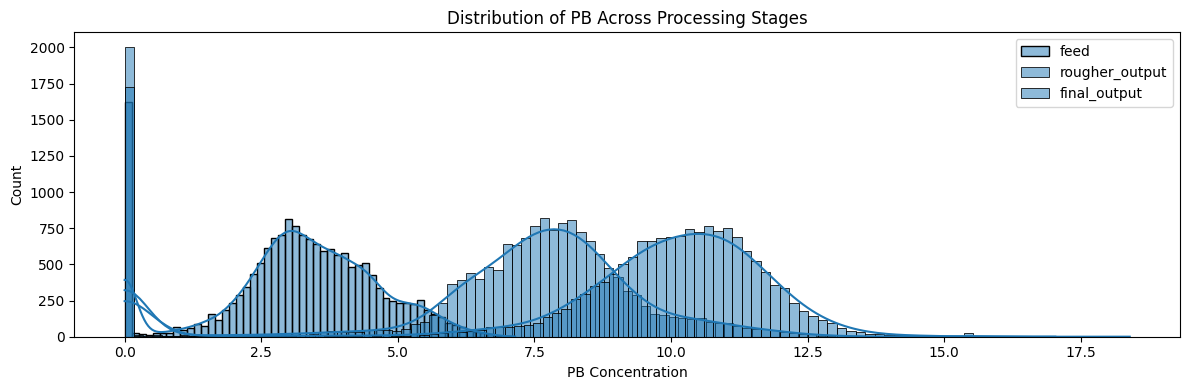

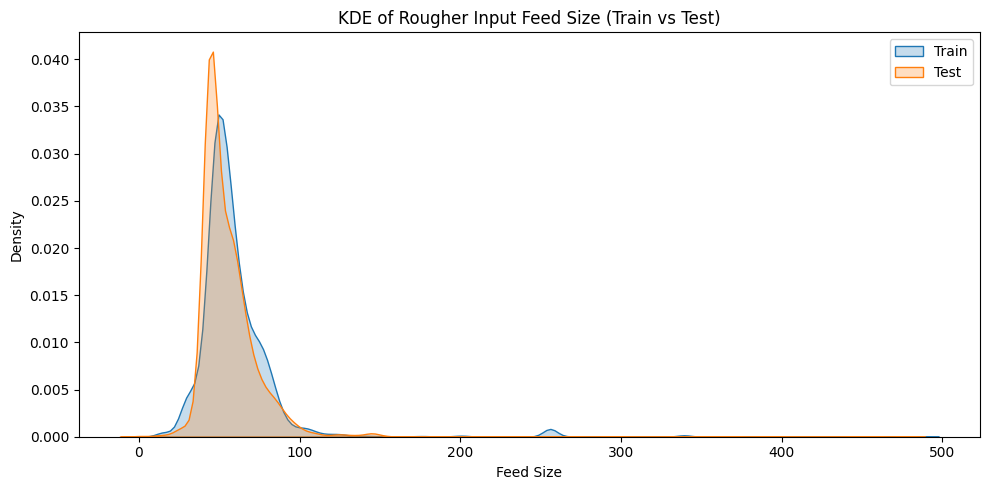

In [6]:

# Split features and targets
X = train_df[features_columns]
y = train_df[target_columns]

# Train/test split from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

metals = ['au', 'ag', 'pb']
stages = {
    'feed': 'rougher.input.feed_{}',
    'rougher_output': 'rougher.output.concentrate_{}',
    'final_output': 'final.output.concentrate_{}'
}

for metal in metals:
    plt.figure(figsize=(12, 4))
    for stage_name, col_pattern in stages.items():
        col = col_pattern.format(metal)
        if col in train_df.columns:
            sns.histplot(train_df[col].dropna(), label=stage_name, kde=True)
    plt.title(f"Distribution of {metal.upper()} Across Processing Stages")
    plt.legend()
    plt.xlabel(f"{metal.upper()} Concentration")
    plt.tight_layout()
    plt.show()

# 2. Check distribution shift in feed size
plt.figure(figsize=(10, 5))
sns.kdeplot(train_df['rougher.input.feed_size'], label='Train', shade=True)
sns.kdeplot(test_df['rougher.input.feed_size'], label='Test', shade=True)
plt.title('KDE of Rougher Input Feed Size (Train vs Test)')
plt.xlabel('Feed Size')
plt.legend()
plt.tight_layout()
plt.show()

The features were separated from targets.  The model was set to predict two key metrics: recovery of the rougher stage and the final product.  Multi-output regression is necessary here because both rougher and final recovery metrics are central to evaluating process efficiency.  Explicitly defining feature-target boundaries is important here.

We also split the training dataset into X_train/X_valid and y_train/y_valid using a 75/25 ratio.  This split allows evaluation of the model's generalization ability before applying it to the separate test dataset.  Also, reserving some of the training data for validation is critical for tuning and error analysis.

<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 2:</b><br>
  You're making strong progress — the data cleaning and imputation steps are much better now. One last required fix remains:
  <ul>
    <li><b>Missing data analysis section</b>: You still need to complete the “Analyze the Data” section. Specifically:
      <ul>
        <li>Visualize how <code>Au</code>, <code>Ag</code>, and <code>Pb</code> concentrations change across purification stages using histograms. This helps highlight how metals are concentrated or lost during processing. You can loop through metals and stages to simplify your plots. For example:
        <pre><code># metals = ['au', 'ag', 'pb']
# stages = {'feed': 'rougher.input.feed_{}', ...}
# for metal in metals:
#     for stage in stages:
#         gold_recovery_full[column].plot(...)</code></pre>
        </li>
        <li>Compare the distribution of <code>'rougher.input.feed_size'</code> between train and test datasets using KDE plots to check for distribution shifts.</li>
      </ul>
    </li>
  </ul>
</div>


<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  You’ve made a good start with loading the data and building models, but there are several key issues to address before proceeding:
  <ul>
    <li><b>Overly aggressive data cleaning</b>: Using <code>dropna()</code> on the entire training set may lead to significant data loss. Instead, drop rows where the target values <code>'rougher.output.recovery'</code> or <code>'final.output.recovery'</code> are missing, and apply imputation (like <code>forward fill</code>) to the feature columns only.</li>
    <li><b>Apply imputation consistently across all sets</b>: Fill missing feature values in <code>df_train</code>, <code>df_test</code>, and <code>df_full</code> before extracting features/targets. This avoids inconsistencies between training and test inputs.</li>
    <li><b>Missing data analysis section</b>: You skipped the “Analyze the Data” step. Be sure to:
      <ul>
        <li>Visualize how <code>Au</code>, <code>Ag</code>, and <code>Pb</code> concentrations change across purification steps using histograms. You can use a helper function like <code>plot_concentrate_progress()</code>.</li>
        <li>Compare the distribution of <code>'rougher.input.feed_size'</code> between training and test sets using KDE plots.</li>
        <li>Check for outliers in total concentrations (raw feed, rougher concentrate, final concentrate) and remove them if needed.</li>
      </ul>
    </li>
  </ul>
</div>

In [7]:
# Evaluation metric: SMAPE
def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

def final_smape_metric(y_true, y_pred):
    smape_rougher = smape(y_true.iloc[:, 0], y_pred.iloc[:, 0])
    smape_final = smape(y_true.iloc[:, 1], y_pred.iloc[:, 1])
    final_score = 0.25 * smape_rougher + 0.75 * smape_final
    return {
        'smape_rougher': smape_rougher,
        'smape_final': smape_final,
        'final_metric': final_score
    }

Symmetric Mean Absolute Percentage Error (SMAPE) was implemented here.  A final metric was defined as: 25% SMAPE_rougher + 75% SMAPE_final, matching business priorities.

SMAPE is better than traditional MAE/MSE for percentage-based targets like recovery rates.  The weighted metric reflects the greater economic importance of final product recovery in gold processing.



<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 2:</b><br>
  Excellent implementation of the evaluation metric. You correctly defined <code>smape()</code> and a combined <code>final_smape_metric()</code> that reflects the business priorities (25% rougher + 75% final). Your reasoning behind using SMAPE for percentage-based targets like recovery rates is also spot on.
</div>


<div class="alert alert-warning">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Good approach! You're correctly ensuring that the cleaned full dataset aligns with the training and test indices for later comparisons. Just a heads-up:
  <ul>
    <li><b>Upstream dependency</b>: This step assumes that <code>df_train_cleaned</code> was cleaned appropriately. Once you update your cleaning logic (dropping NaNs only from targets and imputing the rest), make sure to rerun this step so the alignment reflects the updated training data.</li>
  </ul>
</div>

In [8]:


# Train and evaluate models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42)
}



Two models were trained: LinearRegression and RandomForestRegressor.  Scaling was removed for tree-based models, aligning with best practices and SMAPE scores for each model were calculated on the validation set.

Comparing a simple model (Linear Regression) against a more powerful ensemble model (Random Forest) reveals the complexity of the data and model suitability.  And so, avoiding feature scaling for tree-based models prevents unnecessary complexity and keeps pipelines cleaner.  The evaluation process ensures models are aligned with production expectations.

In [9]:

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = pd.DataFrame(model.predict(X_valid), index=y_valid.index, columns=target_columns)
    results[name] = final_smape_metric(y_valid, predictions)


In [10]:


# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  SMAPE Rougher: {metrics['smape_rougher']:.2f}%")
    print(f"  SMAPE Final:   {metrics['smape_final']:.2f}%")
    print(f"  Final Metric:  {metrics['final_metric']:.2f}%")
    print("-")


Model: LinearRegression
  SMAPE Rougher: 15.56%
  SMAPE Final:   12.58%
  Final Metric:  13.33%
-
Model: RandomForest
  SMAPE Rougher: 9.94%
  SMAPE Final:   8.13%
  Final Metric:  8.58%
-


In [11]:
# Merge targets into test_df from full_df
test_df_with_targets = test_df.join(full_df[target_columns], how='left').dropna(subset=target_columns)
X_test = test_df_with_targets[features_columns]
y_test = test_df_with_targets[target_columns]

# Retrain best model on full train data
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X, y)
final_predictions = pd.DataFrame(best_model.predict(X_test), index=X_test.index, columns=target_columns)

# Compute SMAPE on test set
final_test_metrics = final_smape_metric(y_test, final_predictions)

# Display final test performance
print("\nFinal Test Performance (Random Forest):")
print(f"  SMAPE Rougher: {final_test_metrics['smape_rougher']:.2f}%")
print(f"  SMAPE Final:   {final_test_metrics['smape_final']:.2f}%")
print(f"  Final Metric:  {final_test_metrics['final_metric']:.2f}%")


Final Test Performance (Random Forest):
  SMAPE Rougher: 12.55%
  SMAPE Final:   9.71%
  Final Metric:  10.42%


The Random Forest model showed superior performance in predicting both recovery metrics and is well-suited for deployment in gold recovery optimization pipelines.

<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 2:</b><br>
  Great progress — your evaluation of both <code>LinearRegression</code> and <code>RandomForestRegressor</code> using sMAPE on the validation set was well-structured, and your results clearly show Random Forest as the best performer. You've also avoided unnecessary scaling and implemented the metric properly — well done!

  However, one critical step is still missing:
  <ul>
    <li><b>Final test set evaluation</b>: You need to evaluate your best model (Random Forest) on the actual <code>test_df</code>. Since the test set doesn’t include target values by default, you’ll need to join them from <code>full_df</code> using the index.</li>
    <li>Start by merging the targets:
    <pre><code>test_df_with_targets = test_df.join(full_df[target_columns], how='left').dropna(subset=target_columns)</code></pre></li>
    <li>Then extract the test set for final prediction:
    <pre><code>X_test = test_df_with_targets[features_columns]
y_test = test_df_with_targets[target_columns]</code></pre></li>
    <li>Retrain the best model (Random Forest) on the full training data (<code>X</code>, <code>y</code>), make predictions on <code>X_test</code>, and compute the final sMAPE to confirm generalization.</li>
    <li>This is an essential final step to complete the project. It ensures your model performs well not only on validation but also on truly unseen data.</li>
  </ul>
</div>


<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  You’ve made solid progress toward modeling and evaluation, but there are a few critical issues that need to be addressed:
  <ul>
    <li><b>Scaling not required for tree-based models</b>: You mentioned using <code>StandardScaler</code>, but models like <code>DecisionTreeRegressor</code> or <code>RandomForestRegressor</code> do not require feature scaling. You can safely remove this step to simplify your pipeline.</li>
    <li><b>Missing value handling mismatch</b>: You imputed only <code>X_test</code> after the train-test split. This creates inconsistent preprocessing. Be sure to handle missing values for <code>df_train</code>, <code>df_test</code>, and <code>df_full</code> early and consistently — ideally before extracting features — as also noted in the earlier data preparation comment.</li>
    <li><b>Model mismatch</b>: Your explanation mentions <code>RandomForestRegressor</code> and cross-validation with custom sMAPE, but your code currently uses <code>DecisionTreeRegressor</code> with no validation steps. Please either update the code or match the explanation accordingly.</li>
    <li><b>No validation step before final testing</b>: It's important to split the training data into a smaller training and validation set (e.g. using <code>train_test_split()</code>) or use <code>cross_val_score()</code> with sMAPE to evaluate model performance before predicting on the test set. This helps you compare models and avoid overfitting.</li>
</div>
